In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import os
import pandas as pd
import glob
import pylab as plab
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [26]:
data_dir = "../data"
trainData = data_dir+"/train"

In [27]:
train = pd.read_csv(trainData+"/train.csv")
print("The distribution of different sounds in train data")
dist_train = train.Class.value_counts()/train.Class.count()
print(dist_train)

The distribution of different sounds in train data
jackhammer          0.122907
engine_idling       0.114811
siren               0.111684
air_conditioner     0.110396
children_playing    0.110396
street_music        0.110396
drilling            0.110396
dog_bark            0.110396
car_horn            0.056302
gun_shot            0.042318
Name: Class, dtype: float64


In [6]:
def feature_extractor_train(row):
    fileName = os.path.join(os.path.abspath(trainData),"Train",str(row.ID)+'.wav')
    try:
        data, sample_rate = librosa.load(fileName, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc = 40).T, axis = 0)
    except Exception as e:
        print(e)
        print ("Error encountered in ", fileName)
        return None, None
    feature = mfccs
    label = row.Class
    #print("Feature genereated for ", fileName)
    os.system('clear')
    return [feature, label]


In [53]:
temp = train.apply(feature_extractor_train, axis=1)

In [54]:
features = []
labels = []
for data in temp:
    features.append(list(data[0]))
    labels.append(data[1])

In [55]:
features = np.array(features)
labels = np.array(labels)

In [56]:
#Make the data compitable for deeplearning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
lb = LabelEncoder()
y = lb.fit_transform(labels)


In [57]:
# make a deep neural network to train the data
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 


In [ ]:
y = np_utils.to_categorical(y)

In [70]:
X_trainValid, X_test, y_trainValid,y_test = train_test_split(features,y, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train,y_valid = train_test_split(X_trainValid,y_trainValid, test_size = 0.2, random_state = 42)

In [71]:
X_trainValid.shape,y_trainValid.shape,X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((4348, 40), (4348, 10), (3478, 40), (3478, 10), (870, 40), (870, 10))

In [72]:
label_no = y.shape[1]
filter_size = 2

In [73]:
#Building ANN model
model = Sequential()
model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(label_no))
model.add(Activation('softmax'))

model.compile(loss ='categorical_crossentropy',metrics=['accuracy'], optimizer = 'adam')

In [74]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_valid, y_valid))

Train on 3478 samples, validate on 870 samples
Epoch 1/100
3478/3478 [==============================] - 1s 326us/step - loss: 12.8227 - acc: 0.1518 - val_loss: 11.9222 - val_acc: 0.2103
Epoch 2/100
3478/3478 [==============================] - 0s 117us/step - loss: 10.2554 - acc: 0.2191 - val_loss: 3.1420 - val_acc: 0.3678
Epoch 3/100
3478/3478 [==============================] - 0s 120us/step - loss: 3.4679 - acc: 0.2283 - val_loss: 2.0940 - val_acc: 0.2828
Epoch 4/100
3478/3478 [==============================] - 0s 118us/step - loss: 2.1186 - acc: 0.2625 - val_loss: 1.9332 - val_acc: 0.3793
Epoch 5/100
3478/3478 [==============================] - 0s 125us/step - loss: 1.9874 - acc: 0.2984 - val_loss: 1.7528 - val_acc: 0.4448
Epoch 6/100
3478/3478 [==============================] - 0s 120us/step - loss: 1.8801 - acc: 0.3516 - val_loss: 1.6787 - val_acc: 0.4632
Epoch 7/100
3478/3478 [==============================] - 0s 120us/step - loss: 1.7714 - acc: 0.3787 - val_loss: 1.5171 - val_acc

3478/3478 [==============================] - 0s 116us/step - loss: 0.4855 - acc: 0.8283 - val_loss: 0.4795 - val_acc: 0.8506
Epoch 61/100
3478/3478 [==============================] - 0s 118us/step - loss: 0.5134 - acc: 0.8341 - val_loss: 0.4745 - val_acc: 0.8517
Epoch 62/100
3478/3478 [==============================] - 0s 118us/step - loss: 0.5110 - acc: 0.8321 - val_loss: 0.5106 - val_acc: 0.8299
Epoch 63/100
3478/3478 [==============================] - 0s 116us/step - loss: 0.4973 - acc: 0.8347 - val_loss: 0.4770 - val_acc: 0.8494
Epoch 64/100
3478/3478 [==============================] - 0s 117us/step - loss: 0.4959 - acc: 0.8292 - val_loss: 0.4957 - val_acc: 0.8448
Epoch 65/100
3478/3478 [==============================] - 0s 118us/step - loss: 0.4976 - acc: 0.8306 - val_loss: 0.4518 - val_acc: 0.8460
Epoch 66/100
3478/3478 [==============================] - 0s 113us/step - loss: 0.4787 - acc: 0.8381 - val_loss: 0.4549 - val_acc: 0.8621
Epoch 67/100
3478/3478 [=======================

The accuracy is 0.889604
The confusion matrix is:
[[126   0   2   2   0   0   0   0   0   1]
 [  0  39   1   0   0   0   0   0   0   0]
 [  4   0  88   9   4   0   6   0   2  18]
 [  0   1   3  91   3   0   1   0   5   3]
 [  0   2   1   4 124   0   0   1   0   1]
 [  0   1   1   2   0 126   0   0   0   2]
 [  0   0   0   0   0   0  33   0   0   0]
 [  0   0   2   0   0   0   0 141   0   1]
 [  0   0   0   5   0   2   0   0 104   1]
 [  3   5   9   4   2   2   0   3   1  95]]


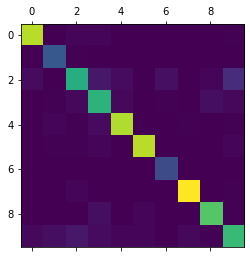

In [75]:
#Validation Phase
labels_test_Predicted = model.predict(X_test)
labels_test_Predicted = [np.argmax(test_y, axis=None, out=None) for test_y in labels_test_Predicted]
y_test_index = [np.argmax(test_y, axis=None, out=None) for test_y in y_test]
cm=metrics.confusion_matrix(labels_test_Predicted,y_test_index)
accuracy = metrics.accuracy_score(y_test_index,labels_test_Predicted)
print("The accuracy is %f"%accuracy)
print("The confusion matrix is:")
print(cm)
plab.matshow(cm)
plab.show()
